In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Compare continuous and discrete model

In [2]:
R = 5
data = os.path.join('..', 'data')

## Compare Pareto sets

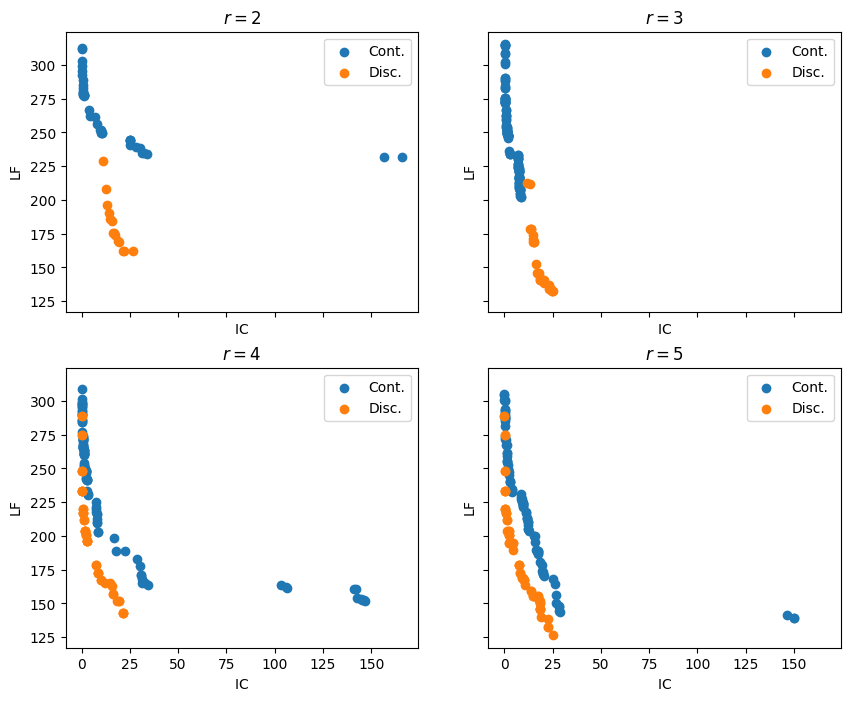

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        ax = axs[i, j]

        cont = pd.read_csv(os.path.join(data, f'continuous_r{2 + 2 * i + j}.csv'))
        ax.scatter(cont['IC'], cont['LF'])

        disc = pd.read_csv(os.path.join(data, f'discrete_r{2 + 2 * i + j}.csv'))
        ax.scatter(disc['IC'], disc['LF'])

        ax.set_title(f'$r={2 + 2 * i + j}$')
        ax.set_xlabel('$\mathsf{IC}$')
        ax.set_ylabel('$\mathsf{LF}$')
        ax.legend(['Cont.', 'Disc.'])

## Compare HV

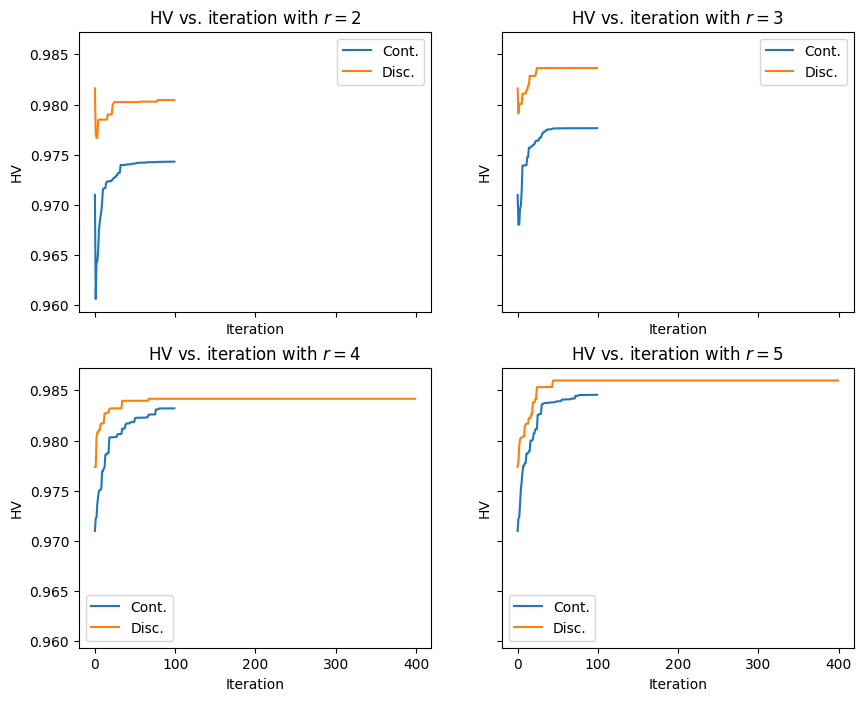

In [4]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        ax = axs[i, j]

        cont = pd.read_csv(os.path.join(data, f'continuous_hv_r{2 + 2 * i + j}.csv'))
        ax.plot(cont['iter'], cont['HV'])

        disc = pd.read_csv(os.path.join(data, f'discrete_hv_r{2 + 2 * i + j}.csv'))
        ax.plot(disc['iter'], disc['HV'])

        ax.set_title(f'HV vs. iteration with $r={2 + 2 * i + j}$')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('HV')
        ax.legend(['Cont.', 'Disc.'])

Calculated (142.6821824790649, 177.51999999999998)


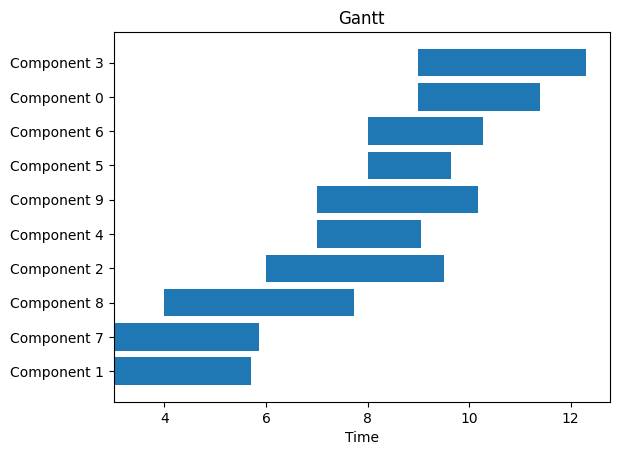

In [5]:
import dill
import numpy as np

from net_flow_opt.utils import structure, components
from net_flow_opt.model import Plan, Activity, System

system = System(structure=structure, components=components)

activities = [Activity(c) for c in components]

plan = Plan(activities=activities, system=system)

prob_type = [
    # 'continuous',
    'discrete'
]

for pt in prob_type:
    for r in range(2, 3):
        f_name = f'{pt}_r{r}'

        with open(os.path.join('..', 'data', f_name), 'rb') as f:
            res = dill.load(f)
        break
    break

# solution index
i = 0

t = res.opt[i].get("X")
print("Calculated", plan.eval(t))
fig = plan.plot_gantt_chart(t)